# PTT 看板Tech_Job
2018/01/01 ~ 2023/01/01

Ptt 看板Tech_Job(科技工作)

Keyword: 求職、裁員

# 資料處理

In [1]:
import jieba
import jieba.analyse
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In /opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/miniconda3/envs/TF1/lib/python3.6/site-packa

In [2]:
df = pd.read_csv("raw_data/Tech_Job_OriginalData.csv")
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好，新年快樂。\n小弟是第一次發文的新鮮人\n目前研替面試一個段落\n拿到...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,2,https://www.ptt.cc/bbs/Tech_Job/M.1514853292.A...,[新聞]【掙扎片】年薪百萬的科技人 卻因這幾點,2018-01-02 00:28:49,Angels5566,Tech_Job,有網友在mobile01分享，自己在科技業已工作9年，年薪約百萬，但最近老婆還是希望他\n去...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""latin0126"", ...",113.196.174.254,2018-04-27 12:51:21,ptt
2,3,https://www.ptt.cc/bbs/Tech_Job/M.1515382875.A...,[徵才]高雄昇雷科技股份有限公司誠徵工程師,2018-01-08 03:35:11,qqgreenmoon,Tech_Job,【公司名稱】\n昇雷科技股份有限公司\n\n【工作職缺】\n1、硬體工程師\n2、系統工程師...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ohmypig"", ""c...",1.173.60.158,2018-04-27 12:51:21,ptt
3,4,https://www.ptt.cc/bbs/Tech_Job/M.1515470624.A...,[新聞]台工程師全東南亞最便宜好用月薪10萬難,2018-01-09 03:57:41,wahaha23,Tech_Job,台工程師全東南亞最便宜好用 月薪10萬難招人台資企業曝原因\nhttps://goo.gl/...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""pgsa"", ""cmtC...",223.140.35.196,2018-04-27 12:51:21,ptt
4,5,https://www.ptt.cc/bbs/Tech_Job/M.1515484201.A...,[請益]合勤科技面試,2018-01-09 07:43:58,leontsai27,Tech_Job,各位版上的大大好\n\n小弟最近收到合勤科技的面試邀約，因為對該公司不是很了解，想請教下大家...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sintyy"", ""cm...",1.173.175.36,2018-04-27 12:51:21,ptt
...,...,...,...,...,...,...,...,...,...,...,...
1683,1684,https://www.ptt.cc/bbs/Tech_Job/M.1672102664.A...,[新聞]凜冬將至！ 科技大咖掀裁員潮,2022-12-27 08:57:40,jeff0025,Tech_Job,凜冬將至！ 科技大咖掀裁員潮\n\n\n「如果手上有現金，2023年是最好的投資時機，因為股...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""moonth66"", ""...",61.218.53.138,2022-12-28 02:08:06,ptt
1684,1685,https://www.ptt.cc/bbs/Tech_Job/M.1672146819.A...,[新聞]小米裁員5000人爆砍單潮台廠4大咖恐遭,2022-12-27 21:13:36,wahaha23,Tech_Job,小米裁員5000人爆砍單潮 台廠4大咖恐遭重擊\nhttps://www.chinatime...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""lookinto"", ""...",1.200.246.105,2022-12-28 02:08:08,ptt
1685,1686,https://www.ptt.cc/bbs/Tech_Job/M.1672167246.A...,Re:[討論]GGCP值不高的把,2022-12-28 02:54:04,xa56,Tech_Job,好文推推\n說實話裡面老將都有腦子\n看你沒怎麼要學也不會一直教啊\n大概就是你努力問他就教...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Interpoint"",...",42.77.180.240,2022-12-29 02:11:56,ptt
1686,1687,https://www.ptt.cc/bbs/Tech_Job/M.1672305717.A...,[新聞]全國最缺這種工程師求供比高達5.7薪水,2022-12-29 17:21:55,peterlin495,Tech_Job,全國最缺這種工程師 求供比高達5.7 薪水超好談\n\n2022-12-29 10:09 聯...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""phantasystar...",42.74.160.18,2022-12-30 02:12:34,ptt


## 資料清理

In [3]:
clear_df = df.copy()

#去除有包含空值的筆數
clear_df.dropna(axis=0, how='any')
#用'。'取代'\n\n'，並移除'\n'
clear_df = clear_df.replace(r'\\n\\n', '。', regex=True).replace(r'\n', '', regex=True)
#移除內文中的網址
clear_df['artContent'] = clear_df['artContent'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
clear_df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好，新年快樂。小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,2,https://www.ptt.cc/bbs/Tech_Job/M.1514853292.A...,[新聞]【掙扎片】年薪百萬的科技人 卻因這幾點,2018-01-02 00:28:49,Angels5566,Tech_Job,有網友在mobile01分享，自己在科技業已工作9年，年薪約百萬，但最近老婆還是希望他去考公...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""latin0126"", ...",113.196.174.254,2018-04-27 12:51:21,ptt
2,3,https://www.ptt.cc/bbs/Tech_Job/M.1515382875.A...,[徵才]高雄昇雷科技股份有限公司誠徵工程師,2018-01-08 03:35:11,qqgreenmoon,Tech_Job,【公司名稱】昇雷科技股份有限公司【工作職缺】1、硬體工程師2、系統工程師3、天線工程師4、軟...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""ohmypig"", ""c...",1.173.60.158,2018-04-27 12:51:21,ptt
3,4,https://www.ptt.cc/bbs/Tech_Job/M.1515470624.A...,[新聞]台工程師全東南亞最便宜好用月薪10萬難,2018-01-09 03:57:41,wahaha23,Tech_Job,台工程師全東南亞最便宜好用 月薪10萬難招人台資企業曝原因,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""pgsa"", ""cmtC...",223.140.35.196,2018-04-27 12:51:21,ptt
4,5,https://www.ptt.cc/bbs/Tech_Job/M.1515484201.A...,[請益]合勤科技面試,2018-01-09 07:43:58,leontsai27,Tech_Job,各位版上的大大好小弟最近收到合勤科技的面試邀約，因為對該公司不是很了解，想請教下大家的意見像...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""sintyy"", ""cm...",1.173.175.36,2018-04-27 12:51:21,ptt


In [4]:
clear_df.iloc[1]["artContent"]

'有網友在mobile01分享，自己在科技業已工作9年，年薪約百萬，但最近老婆還是希望他去考公職，但自己卻感到苦惱，不知是否要轉職到公職。網友說，今年35歲，已在科技業打滾9年，目前在高雄的科技業，純月薪5萬左右，年薪約100萬（含獎金分紅），上下班都還算正常，大概也就6點左右下班，當然偶而還是要加班，但最近太太一直在說希望我去考公職，畢竟公職比較穩定，原因如下。1，現在這個部門可以正常上下班，換部門之後呢；2，會不會有被裁員的機會；3，獎金和分紅不穩定；4，退休後沒有依靠（只能靠沒用的勞保，或是要存錢給以後用）。網友說，自己很苦腦的點也有幾個，1，雖然說公務員穩定，退休還有月退俸（每個月大概也會有個5萬左右），但是以現在年金改革的狀況，難保會不會變成3萬；2，考上公務員後，年薪瞬間少2~30萬（就當存起來在退休再用嗎？）；3，公務員福利和補貼比較多。有人說，公職雖好，但也要考上在煩惱吧，我確實有碰到竹科的人跑去考公職；也有人說，重點在薪水，如果科技業薪水沒有公職2倍，那有了公職，其實意義不大，畢竟你付出了時間。估算一下兩邊所能夠賺的錢和身體，就知道哪邊划算。還有人分析，一般公職可能對樓主CP值太低了，畢竟年薪百萬等於讀好幾年又要減半薪，高普初考錄取率跟台政清交差不多低，約3~5%左右，你會覺得台大水準畢業的人領3~5萬太多？公職薪資待遇也沒有高到離譜，就跟一般科技業差不多，重點是可能還要多讀個好幾年，高考4.6萬~6萬（年薪60~80幾萬）；普考3.6~4.5萬（年薪40~50幾萬）；多數平均初考2.8~3.5萬（年薪30~40幾萬），且公職年薪要破百可能要作15~20年（薦9或簡10）以後。（財經中心／台北報導）新聞來源:'

## 斷句

In [5]:

clear_df['artContent'] = clear_df['artContent'].str.split("[,，。！!？?]{1,}")
sent_df = clear_df.explode('artContent').reset_index(drop=True) # 1 element 1 row

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,新年快樂,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎屋的offer想請各位提供意見以...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
3,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,確定前往另發正式聘書4.瑞鼎科技 Raydium職缺：類比ic工程師（車用）職等：未知職稱：...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
4,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,若無法再租屋尚未有offer,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt


## 斷詞

In [6]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt

jieba.set_dictionary('dict/dict.txt')
jieba.load_userdict('dict/user_dict.txt')

Building prefix dict from /home/yorkcho/text-mining/dict/dict.txt ...
Loading model from cache /tmp/jieba.ud9697fbb0c595e4880eb57eb80df8456.cache
Loading model cost 0.713 seconds.
Prefix dict has been built successfully.


In [7]:
sent_df['artContent'] = sent_df['artContent'].str.replace(r'[^\w\s\d]+', '', regex=True).astype(str)
sent_df = sent_df[sent_df["artContent"].str.len() > 1]

sent_df.head()

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,各位年薪千萬的大大好,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,新年快樂,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,小弟是第一次發文的新鮮人目前研替面試一個段落拿到以下幾家豬屎屋的offer想請各位提供意見以...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
3,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,確定前往另發正式聘書4瑞鼎科技 Raydium職缺類比ic工程師車用職等未知職稱未知薪資NN...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt
4,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,若無法再租屋尚未有offer,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt


In [8]:
word_df = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

word_df = word_df.loc[word_df['word'].str.len()>1]

word_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,各位
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,千萬
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,大大
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


In [9]:
word_df["word"][0:20]

0       各位
0       年薪
0       千萬
0       大大
1       新年
1       快樂
2       小弟
2       第一
2       發文
2      新鮮人
2       目前
2       研替
2       面試
2       一個
2       段落
2       拿到
2       以下
2       幾家
2       豬屎
2    offer
Name: word, dtype: object

In [10]:
# 停用字移除

# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

In [11]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,小弟
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


In [12]:
# 計算詞頻

freq_df = pd.DataFrame({'freq':noStop_df.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df = freq_df[clist]
freq_df

,word,freq
0,公司,4902
1,工作,3702
2,面試,3598
3,主管,1963
4,員工,1683
...,...,...
41308,打手機,1
41309,打打,1
41310,打打氣,1
41311,打打球,1


## 畫圖

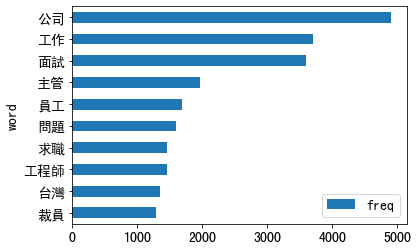

In [13]:
# 設定圖的字體
# from matplotlib.font_manager import FontProperties
# myfont =  FontProperties(fname = '/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')

plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

freq_df.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 重新加入停用詞

In [14]:
# 參數形式手動加入停用字
stopwords_manual = ['內容','表示','主要','小弟','最近','發現','相關','目前',"工作","面試","主管","員工","工程師","公司",'年終','福利','系統廠','IC設計','晶片','因上','因一','過去','一位',"名稱", "有沒有", "就是", "完整", "有無", "是否"]
stopwords.extend(stopwords_manual)

In [15]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新鮮人
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,績效
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人


In [16]:
# 重新計算詞頻
freq_df_2 = pd.DataFrame({'freq':noStop_df_2.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']  
freq_df_2 = freq_df_2[clist]
freq_df_2

,word,freq
0,問題,1589
1,求職,1465
2,台灣,1347
3,裁員,1290
4,薪資,1210
...,...,...
41282,打打球,1
41283,打抱不平,1
41284,打招呼,1
41285,打掃,1


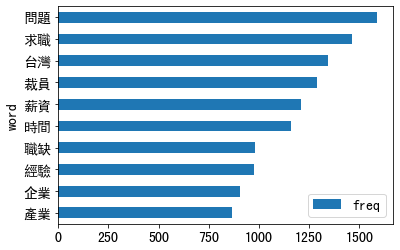

In [17]:
freq_df_2.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 重新斷詞

In [18]:
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict("dict/user_dict.txt")

In [19]:
jieba.add_word('自我介紹')

In [20]:
# 重新斷詞

# sent_df是還沒斷詞過的df
word_df_2 = sent_df.assign(word = sent_df['artContent'].apply(jieba.lcut)).explode('word').drop(['artContent'], axis=1)

#把長度小於1的row刪掉
word_df_2 = word_df_2.loc[word_df_2['word'].str.len()>1]
word_df_2

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,各位
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,千萬
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,大大
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,列出


### 重新移除停用字

In [21]:
noStop_df_3 = word_df_2[~word_df_2['word'].isin(stopwords)]
noStop_df_3

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artComment,e_ip,insertedDate,dataSource,word
0,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,年薪
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新年
1,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,快樂
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,發文
2,1,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,[請益]研替offer（類比科/力智/鈺創/瑞鼎）,2018-01-01 18:19:10,elohaxup6xl3,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hsucheng"", ""...",223.141.230.104,2018-04-27 12:51:21,ptt,新鮮人
...,...,...,...,...,...,...,...,...,...,...,...
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,績效
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,考核
64931,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,系統
64932,1688,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,[新聞]Google傳告訴全體員工：明年將有更多人考,2022-12-31 21:31:13,AAAB,Tech_Job,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""Jerry469"", ""...",123.194.181.40,2023-01-01 02:07:04,ptt,經理人


### 重新計算詞頻

In [22]:
freq_df_3 = pd.DataFrame({'freq':noStop_df_3.groupby(['word']).size().sort_values(ascending=False)}).reset_index(drop = False)

clist = ['word','freq']
freq_df_3 = freq_df_3[clist]
freq_df_3

,word,freq
0,問題,1589
1,求職,1465
2,台灣,1347
3,裁員,1290
4,薪資,1210
...,...,...
41283,打打球,1
41284,打抱不平,1
41285,打招呼,1
41286,打掃,1


### 重新繪製詞頻長條圖

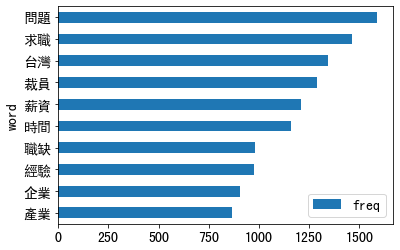

In [23]:
freq_df_3.iloc[:10].plot.barh(x='word', y='freq').invert_yaxis()
plt.show()

## 文字雲

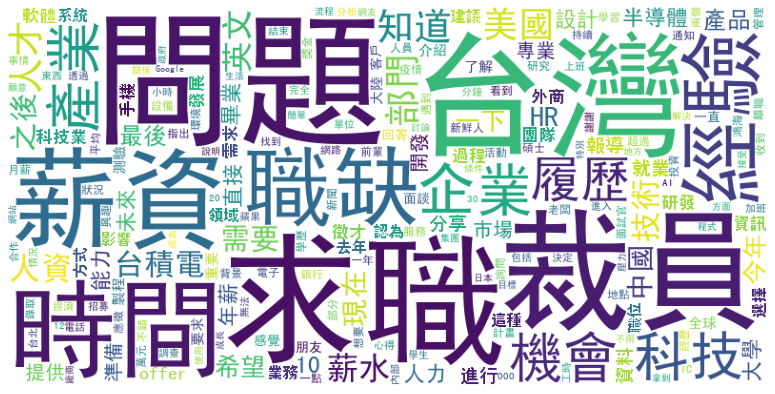

In [24]:
# 詞頻變成dict
freq_dict = freq_df_3.set_index('word', inplace=False).to_dict()
freq_dict = freq_dict['freq']

# 繪製文字雲
FontPath = './raw_data/chinese.simhei.ttf' # 設定字型
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=FontPath, max_words=200)
wordcloud.generate_from_frequencies(freq_dict)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
# import matplotlib as mpl
# import matplotlib
# mpl.matplotlib_fname()

In [26]:
# matplotlib.get_cachedir()

情緒分析大綱
+ 1. 套件說明
+ 2. 資料前處理
    + 2.1 基本資料介紹
    + 2.2 資料清理
    + 2.3 文章斷詞
+ 3. lexicon-base 情緒分析
    + 3.1 準備LIWC情緒字典
    + 3.2 情緒字典與斷詞結果進行合併
    + 3.3 正負向情緒分數聲量折線圖圖
    + 3.4 正負向情緒分數比例折線圖圖
    + 3.5 文字雲
    + 3.6 情緒代表字
    + 3.7 每日情緒分數

In [32]:
from datetime import datetime
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
from matplotlib.colors import Colormap
from wordcloud import WordCloud 
import jieba
%matplotlib inline

In [33]:
#plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
fprop = fm.FontProperties(fname="./raw_data/SourceHanSansTW-Regular.otf")
fprop


# 設定整份 notebook 圖片的長寬與 dpi
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 150

# 情緒分析
## 準備LIWC字典  
- 全名Linguistic Inquiry and Word Counts，由心理學家Pennebaker於2001出版  
>  就英文版的LIWC2007來說，目前包含了64個定義類別。這些類別包括基本的語文向度類別，例如： 22個語文特性類別（如，代名詞、冠詞等百分比）、3個副語言學（paralinguistic）類別（如應和詞、停頓詞等）。除了已經有具有明確定義的語文類別之外，LIWC也另外包含了32個心理特性類別（如，情感詞、認知詞等）、7個個人化類別（如工作、休閒活動等）。再加上程式自動計算出的6個一般描述性類別（總詞數、每句詞數等）以及12個標點符號類別（如句點、逗點等），總計可輸出80個字詞類別。
- https://cliwc.weebly.com/liwc20073542220856.html 
- https://cliwc.weebly.com/35422208563900621029200131228933521259913549826126.html

In [34]:
# 讀取情緒字典
liwc_dict = pd.read_csv("./dict/liwc/LIWC_CH.csv")
liwc_dict = liwc_dict.rename(columns={'name': 'word', "class": 'sentiments'})
liwc_dict.head()

,word,sentiments
0,):,affect
1,3q,affect
2,:(,affect
3,:),affect
4,<3,affect


In [35]:
# 求職議題中，"問題"可能不代表情緒
# 移除特定情緒
idx = liwc_dict[liwc_dict["word"]=='問題'].index.values
idx = list(idx)

In [36]:
liwc_dict = liwc_dict.drop(idx,axis=0)

In [37]:
idx = liwc_dict[liwc_dict["word"]=='控制'].index.values
idx = list(idx)

In [38]:
liwc_dict = liwc_dict.drop(idx,axis=0)

In [39]:
liwc_dict['sentiments'].value_counts()

affect      2059
negative    1170
positive     730
anger        358
sad          192
anx          169
Name: sentiments, dtype: int64

In [40]:
ptt_df = noStop_df_2.copy()
ptt_df["artDate"] = pd.to_datetime(ptt_df["artDate"])

In [41]:
ptt_df["artDate"].describe(datetime_is_numeric=True)

count                           325090
mean     2020-06-14 00:34:38.162991872
min                2018-01-01 18:19:10
25%                2019-01-30 14:25:31
50%                2020-06-16 16:53:53
75%                2021-10-03 11:37:39
max                2022-12-31 21:31:13
Name: artDate, dtype: object

In [42]:
ptt_df["artDate"] = ptt_df["artDate"].dt.date

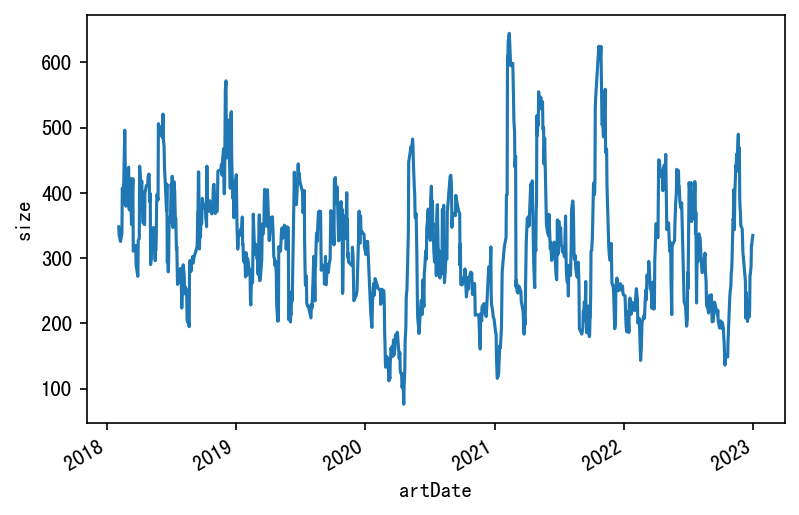

In [43]:
ptt_line_plot = ptt_df.groupby(["artDate"], as_index=False).size() # 多出size欄位

fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_line_plot["artDate"], ptt_line_plot["size"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel('size')
fig.autofmt_xdate()
plt.show()

可以看到 2021~2022 是發文多的時間

## 情緒字典與斷詞結果進行合併
將情緒字典與斷詞結果進行合併。。

![](https://statisticsglobe.com/wp-content/uploads/2021/12/join-types-python-merge-programming.png)

In [44]:
# 記得merge是靠相同欄位名稱合併
ptt_liwc_df = pd.merge(ptt_df[["artDate", "artUrl", "word"]], liwc_dict, how="left")
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,年薪,NaN
1,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,新年,NaN
2,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,快樂,affect
3,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,快樂,positive
4,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,發文,NaN
...,...,...,...,...
345404,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,績效,NaN
345405,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,考核,NaN
345406,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,系統,NaN
345407,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,經理人,NaN


## 正負向情緒分數聲量折線圖圖
分別畫出文集中，正向（positive）與負向（negative）情緒的折線圖

In [45]:
sentiment_count = pd.DataFrame(
    ptt_liwc_df.groupby(["artDate", "sentiments"], dropna=False, as_index=False).size()
)
sentiment_count = sentiment_count.rename(columns={0: "size"})
sentiment_count = sentiment_count.sort_values(["artDate"])
sentiment_count

,artDate,sentiments,size
0,2018-01-01,affect,19
1,2018-01-01,positive,15
2,2018-01-01,NaN,250
8,2018-01-02,sad,2
7,2018-01-02,positive,6
...,...,...,...
4955,2022-12-31,anx,3
4957,2022-12-31,positive,3
4953,2022-12-31,affect,8
4954,2022-12-31,anger,1


In [46]:
sentiment_count["sentiments"] == "positive"

0       False
1        True
2       False
8       False
7        True
        ...  
4955    False
4957     True
4953    False
4954    False
4958    False
Name: sentiments, Length: 4959, dtype: bool

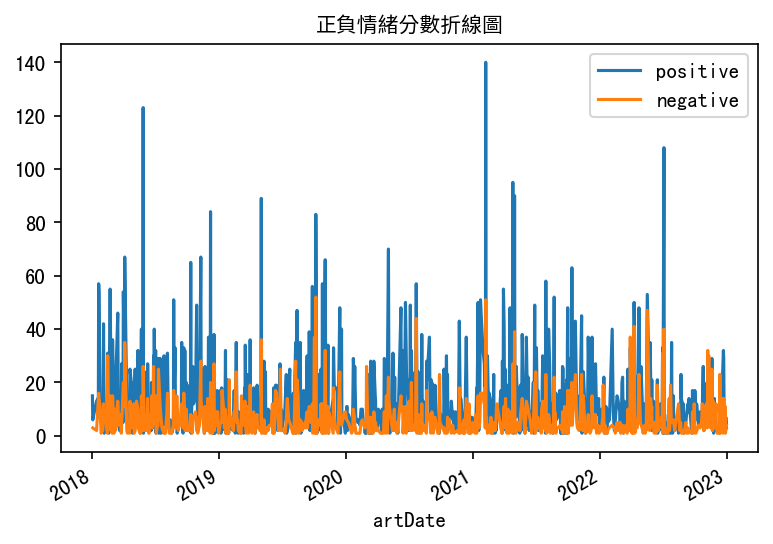

In [50]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

ax.plot(pos["artDate"], pos["size"], color=colors[0])
ax.plot(neg["artDate"], neg["size"], color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖", 
          fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

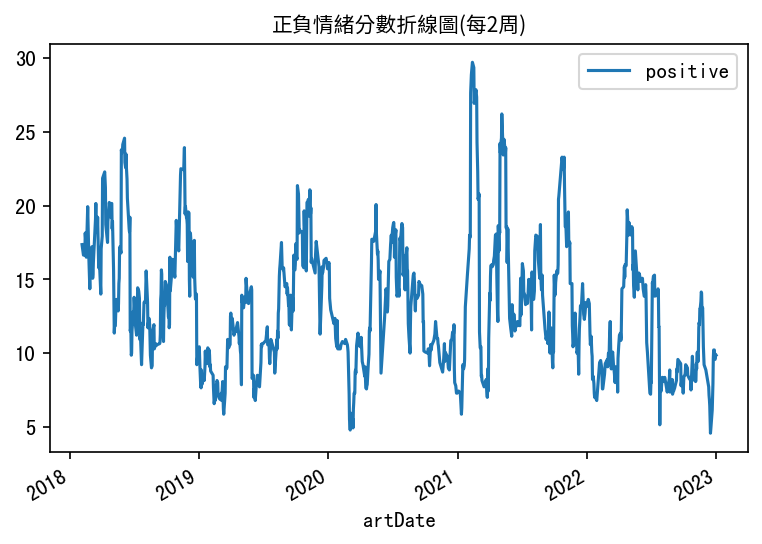

In [51]:
colors = ["tab:blue", "tab:orange"]
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

# fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # 也可以在該圖設定參數
fig, ax = plt.subplots()

# 使用 Series.rolling().mean() 來產生 14 天移動平均
rolling_days = 14
ax.plot(pos["artDate"], pos['size'].rolling(rolling_days).mean(), color=colors[0])
# ax.plot(neg["artDate"], neg["size"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
# plt.ylabel('size')
ax.legend(["positive", "negative"], loc="upper right")
fig.autofmt_xdate()
plt.title("正負情緒分數折線圖(每2周)", fontproperties=fprop)  # 記得加上才能顯示中文
plt.show()

### 正負向情緒分數比例折線圖圖

In [52]:
sentiment_count = sentiment_count.assign(
    ratio=sentiment_count.groupby("artDate")["size"].transform(lambda n: n / n.sum())
)
sentiment_count

,artDate,sentiments,size,ratio
0,2018-01-01,affect,19,0.066901
1,2018-01-01,positive,15,0.052817
2,2018-01-01,NaN,250,0.880282
8,2018-01-02,sad,2,0.010582
7,2018-01-02,positive,6,0.031746
...,...,...,...,...
4955,2022-12-31,anx,3,0.013274
4957,2022-12-31,positive,3,0.013274
4953,2022-12-31,affect,8,0.035398
4954,2022-12-31,anger,1,0.004425


In [53]:
pos = sentiment_count[sentiment_count["sentiments"] == "positive"]
neg = sentiment_count[sentiment_count["sentiments"] == "negative"]

Text(0.5, 1.0, '正負情緒比例折線圖')

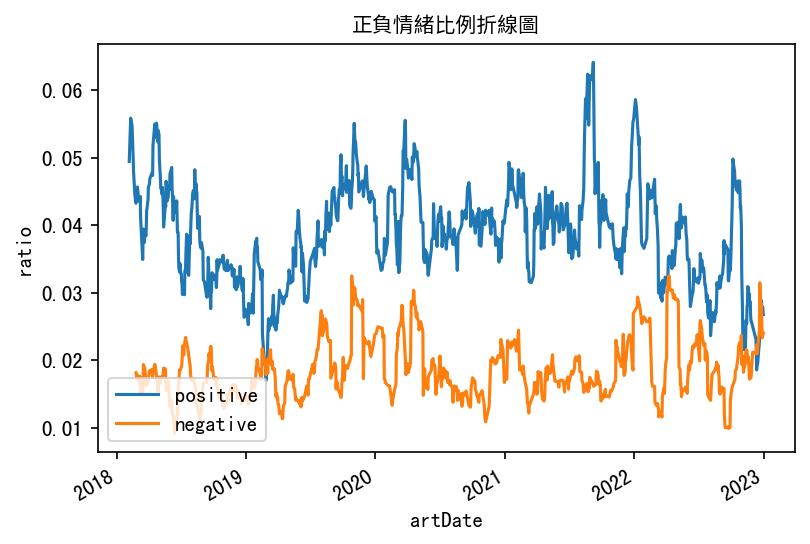

In [54]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(pos["artDate"], pos["ratio"].rolling(rolling_days).mean(), color=colors[0])
ax.plot(neg["artDate"], neg["ratio"].rolling(rolling_days).mean(), color=colors[1])

plt.xlabel("artDate")
plt.ylabel("ratio")
ax.legend(["positive", "negative"], loc="lower left")
fig.autofmt_xdate()
plt.title("正負情緒比例折線圖", fontproperties=fprop)

###文字雲
針對不同日期畫出該天的文字雲，如果文字雲中的字詞大小越大，代表出現頻率越高

In [55]:
mask = sentiment_count['sentiments'] == 'positive'
sentiment_count.loc[mask,:].sort_values("size", ascending=False).head()

,artDate,sentiments,size,ratio
2982,2021-02-06,positive,140,0.043505
345,2018-05-27,positive,123,0.050245
4384,2022-07-04,positive,108,0.042874
3200,2021-04-25,positive,95,0.058933
3225,2021-04-30,positive,90,0.043207


### (job)2021-02-06 文字雲
2021-02-06 是正面詞彙次數最高的一天。我們可以用文字雲來觀察，美食版在這天最常出現的正面情緒字有哪些。

In [56]:
ptt_liwc_df

,artDate,artUrl,word,sentiments
0,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,年薪,NaN
1,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,新年,NaN
2,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,快樂,affect
3,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,快樂,positive
4,2018-01-01,https://www.ptt.cc/bbs/Tech_Job/M.1514831112.A...,發文,NaN
...,...,...,...,...
345404,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,績效,NaN
345405,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,考核,NaN
345406,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,系統,NaN
345407,2022-12-31,https://www.ptt.cc/bbs/Tech_Job/M.1672493477.A...,經理人,NaN


In [57]:
date = "2021-02-06"
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date))
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

[('人資', 35),
 ('測驗', 30),
 ('職缺', 26),
 ('朋友', 24),
 ('求職', 23),
 ('適合', 22),
 ('問題', 20),
 ('適性', 19),
 ('之後', 18),
 ('時間', 17),
 ('產品', 17),
 ('期望', 16),
 ('無聲', 16),
 ('台灣', 15),
 ('客戶', 15),
 ('履歷', 15),
 ('特質', 15),
 ('知道', 15),
 ('KLA', 14),
 ('分享', 14)]

(-0.5, 799.5, 399.5, -0.5)

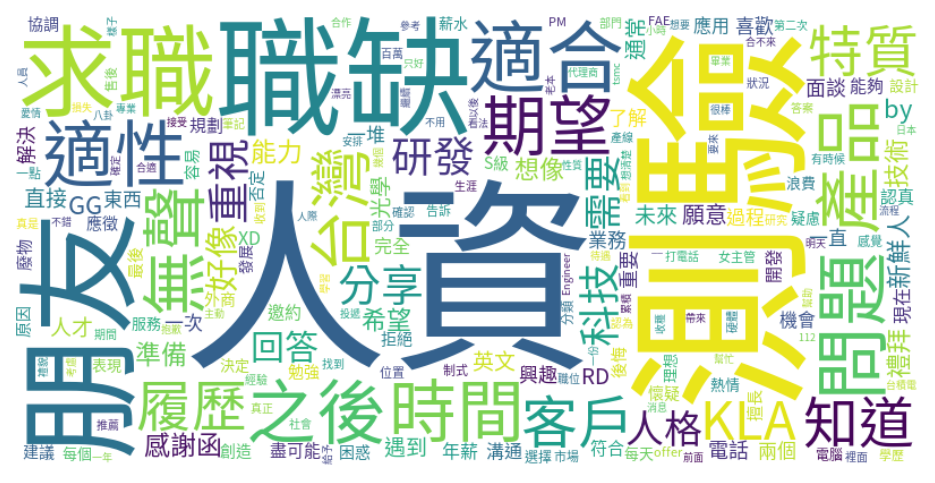

In [58]:
# wordcloud 的 input 是 dictionary
font_path = "./raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white",width=800, height = 400, font_path=font_path)
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
# plt.show()

(-0.5, 799.5, 399.5, -0.5)

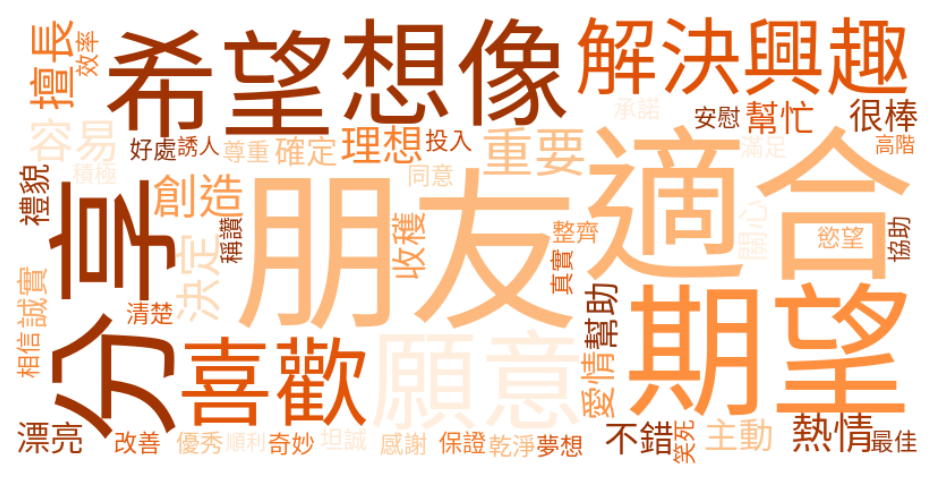

In [59]:

mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "positive"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "./raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white",width=800, height = 400, font_path=font_path, colormap="Oranges")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

(-0.5, 799.5, 399.5, -0.5)

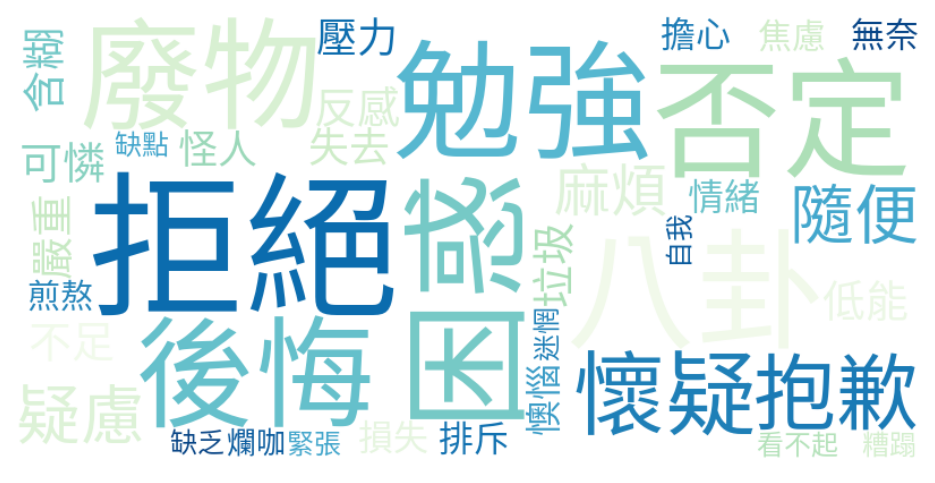

In [60]:

mask = (ptt_liwc_df["artDate"] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"] == "negative"
)
ptt_df_wc = ptt_liwc_df.loc[mask, ["artDate", "word"]]
wc = ptt_df_wc.groupby(["word"]).size().to_dict()
Counter(wc).most_common(20)

# wordcloud 的 input 是 dictionary
font_path = "./raw_data/SourceHanSansTW-Regular.otf"  # 中文字型路徑
cloud = WordCloud(max_words=200, background_color="white", width=800, height = 400,font_path=font_path, colormap="GnBu")
cloud.generate_from_frequencies(wc)
# 繪圖
plt.figure(figsize=(8, 4), dpi=150)
plt.imshow(
    cloud, 
    interpolation="bilinear"
)
plt.axis("off")
# plt.show()

## 情緒代表字
從整個文集中計算出正負向情緒字的出現詞頻，並找出情緒的代表字

In [61]:
word_count = ptt_liwc_df.groupby(["word", "sentiments"]).size().reset_index()
word_count = word_count.rename(columns={0: "size"})
word_count = word_count.sort_values(["size"], ascending=False)
word_count

,word,sentiments,size
738,希望,affect,592
739,希望,positive,592
274,分享,positive,464
273,分享,affect,464
2206,重要,affect,363
...,...,...,...
178,偏愛,affect,1
179,偏愛,positive,1
1079,抑鬱,sad,1
1078,抑鬱,negative,1


In [62]:
word_of_pos = word_count.loc[(word_count["sentiments"] == "positive")]
word_of_pos

,word,sentiments,size
739,希望,positive,592
274,分享,positive,464
2207,重要,positive,363
1287,朋友,positive,349
1636,獎金,positive,297
...,...,...,...
1899,能幹,positive,1
1062,扶持,positive,1
1910,膽量,positive,1
1874,美妙,positive,1


In [63]:
word_of_neg = word_count.loc[(word_count["sentiments"] == "negative")]
word_of_neg

,word,sentiments,size
1922,自我,negative,286
552,壓力,negative,221
527,困難,negative,140
1182,擔心,negative,129
518,嚴重,negative,91
...,...,...,...
1879,羞恥,negative,1
176,偏執狂,negative,1
1089,折磨,negative,1
1078,抑鬱,negative,1


In [64]:
word_of_neg.sort_values(
    ["size"], ascending=False
).head(30)

,word,sentiments,size
1922,自我,negative,286
552,壓力,negative,221
527,困難,negative,140
1182,擔心,negative,129
518,嚴重,negative,91
2299,風險,negative,89
65,不足,negative,86
2006,衝擊,negative,79
1105,拒絕,negative,76
2245,降低,negative,76


/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, '負向情緒總數')

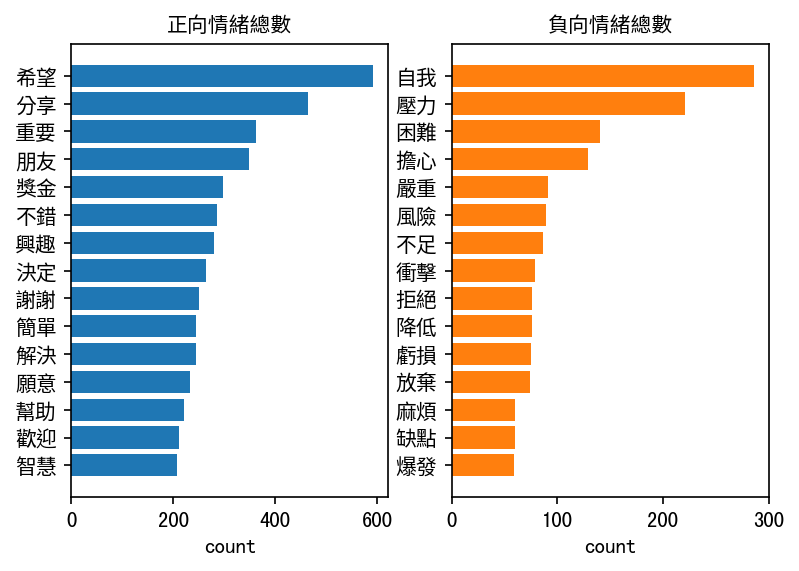

In [65]:
pos = word_of_pos.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]
neg = word_of_neg.sort_values(
    ["size"], ascending=True
).iloc[-15:,:]

fig, ax = plt.subplots(1, 2)

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)
ax[0].set_title("正向情緒總數", fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
ax[1].set_title("負向情緒總數", fontproperties=fprop)

另外，也可以依據不同日期觀察情緒代表字的變化
###  正負情緒代表字

In [66]:
# 負面代表2019/10/6 
sentiment_count[sentiment_count["sentiments"] == "negative"].sort_values('size', ascending=False)

,artDate,sentiments,size,ratio
1820,2019-10-06,negative,52,0.023339
2981,2021-02-06,negative,51,0.015848
4257,2022-05-17,negative,47,0.028468
2535,2020-07-21,negative,44,0.026994
4152,2022-04-09,negative,41,0.022043
...,...,...,...,...
4214,2022-05-05,negative,1,0.011236
3519,2021-08-27,negative,1,0.005495
4232,2022-05-11,negative,1,0.002415
1349,2019-04-14,negative,1,0.007194


In [67]:
# 正面 2021-02-06
sentiment_count[sentiment_count["sentiments"] == "positive"].sort_values('size', ascending=False)

,artDate,sentiments,size,ratio
2982,2021-02-06,positive,140,0.043505
345,2018-05-27,positive,123,0.050245
4384,2022-07-04,positive,108,0.042874
3200,2021-04-25,positive,95,0.058933
3225,2021-04-30,positive,90,0.043207
...,...,...,...,...
4422,2022-07-16,positive,1,0.004785
1029,2019-01-06,positive,1,0.005988
2254,2020-04-13,positive,1,0.033333
4408,2022-07-11,positive,1,0.022222


In [68]:
date = '2019/10/6'
mask = (ptt_liwc_df['artDate'] == pd.Timestamp(date)) & (
    ptt_liwc_df["sentiments"].isin(['positive', 'negative'])
)

ptt_df_date = ptt_liwc_df.loc[mask, ["artDate", "word", "sentiments"]]
ptt_df_date_senti = ptt_df_date.groupby(["sentiments", "word"], as_index=False).size()
ptt_df_date_senti.head()

,sentiments,word,size
0,negative,不爽,1
1,negative,不知所措,1
2,negative,侮辱,1
3,negative,假裝,1
4,negative,危險,1


/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/miniconda3/envs/TF1/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


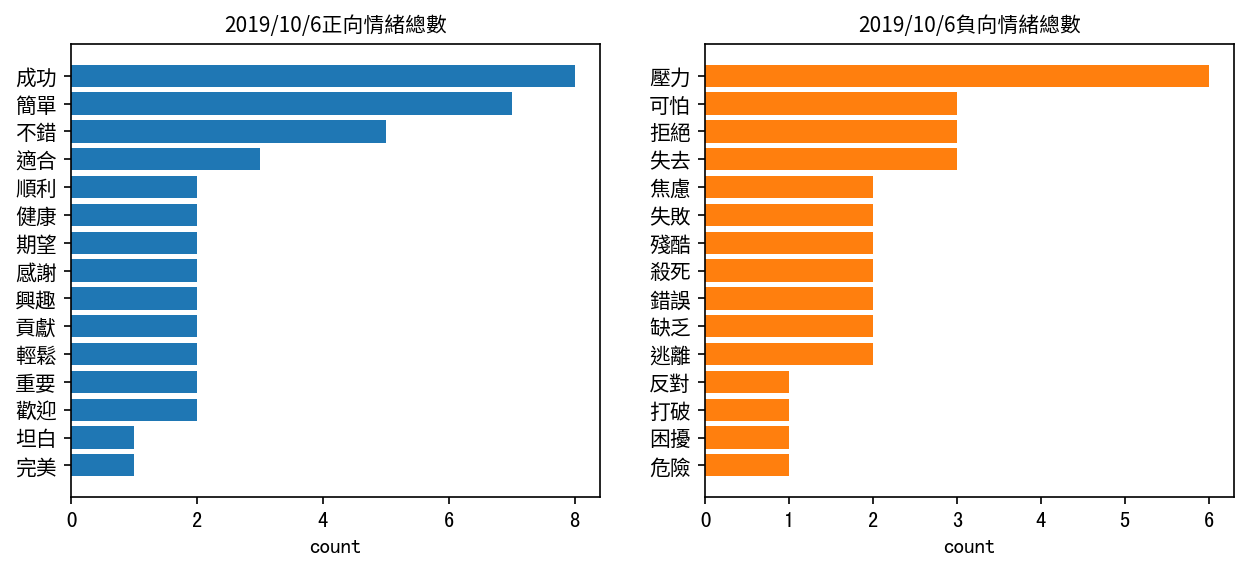

In [69]:
pos = ptt_df_date_senti[(ptt_df_date_senti["sentiments"] == "positive")].sort_values(
    ["size"], ascending=True
)
pos = pos[-15:]
neg = ptt_df_date_senti[ptt_df_date_senti["sentiments"] == "negative"].sort_values(
    ["size"], ascending=True
)
neg = neg[-15:]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(pos["word"], pos["size"], color=colors[0])
ax[0].set_xlabel("count")
ax[0].set_title(f"{date}正向情緒總數", fontproperties=fprop)
ax[0].set_yticklabels(pos["word"], fontproperties=fprop)

ax[1].barh(neg["word"], neg["size"], color=colors[1])
ax[1].set_xlabel("count")
ax[1].set_title(f"{date}負向情緒總數", fontproperties=fprop)
ax[1].set_yticklabels(neg["word"], fontproperties=fprop)
plt.show()

## 每日情緒分數趨勢

In [70]:
sentiment_count

,artDate,sentiments,size,ratio
0,2018-01-01,affect,19,0.066901
1,2018-01-01,positive,15,0.052817
2,2018-01-01,NaN,250,0.880282
8,2018-01-02,sad,2,0.010582
7,2018-01-02,positive,6,0.031746
...,...,...,...,...
4955,2022-12-31,anx,3,0.013274
4957,2022-12-31,positive,3,0.013274
4953,2022-12-31,affect,8,0.035398
4954,2022-12-31,anger,1,0.004425


![melt](https://pandas.pydata.org/docs/_images/reshaping_melt.png)
![pivot](https://pandas.pydata.org/docs/_images/reshaping_pivot.png)

In [71]:
ptt_sentiment_value = (
    sentiment_count.pivot_table(
        index="artDate", columns="sentiments", values="size", fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad
0,2018-01-01,19,0,0,0,15,0
1,2018-01-02,11,1,2,3,6,2
2,2018-01-08,11,0,0,0,10,0
3,2018-01-13,16,0,0,2,13,0
4,2018-01-17,15,0,0,0,14,0


In [72]:
# sentiment 計算方式: positive - anger - anx - negative - sad
ptt_sentiment_value["sentiment_value"] = (
    ptt_sentiment_value["positive"]
    - ptt_sentiment_value["anger"]
    - ptt_sentiment_value["anx"]
    - ptt_sentiment_value["negative"]
    - ptt_sentiment_value["sad"]
)
ptt_sentiment_value.head()

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
0,2018-01-01,19,0,0,0,15,0,15
1,2018-01-02,11,1,2,3,6,2,-2
2,2018-01-08,11,0,0,0,10,0,10
3,2018-01-13,16,0,0,2,13,0,11
4,2018-01-17,15,0,0,0,14,0,14


In [73]:
# 情緒分數
ptt_sentiment_value.sort_values(["sentiment_value"],ascending=False)

,artDate,affect,anger,anx,negative,positive,sad,sentiment_value
66,2018-05-27,152,3,10,26,123,3,81
622,2021-04-25,142,4,2,27,95,2,60
578,2021-02-06,217,11,13,51,140,9,56
150,2018-10-11,81,2,0,8,65,1,54
178,2018-12-07,117,3,3,20,84,5,53
...,...,...,...,...,...,...,...,...
202,2019-01-09,21,6,5,17,2,2,-28
345,2019-10-02,67,6,10,37,29,5,-29
803,2022-03-29,73,18,8,37,33,0,-30
926,2022-11-10,60,4,11,30,22,15,-38


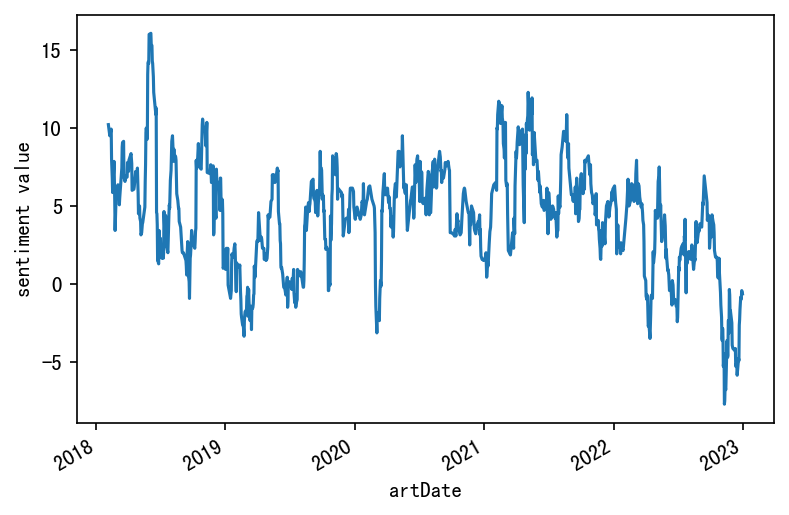

In [74]:
fig, ax = plt.subplots()

rolling_days = 14
ax.plot(ptt_sentiment_value["artDate"], ptt_sentiment_value["sentiment_value"].rolling(rolling_days).mean())
ax.set_xlabel("artDate")
ax.set_ylabel("sentiment value")
fig.autofmt_xdate()

In [75]:
# 最多負面詞的一天
clear_df_date = clear_df.copy()
clear_df_date["artDate"] = pd.to_datetime(clear_df_date["artDate"])
clear_df_date["artDate"] = clear_df_date["artDate"].dt.date
time = '2019-10-06' 
time = datetime.strptime(time, "%Y-%m-%d").date()
type(time)

datetime.date

In [76]:
#clear_df[clear_df["artDate"] == time]["artContent"].iloc[1]

In [77]:
# 情緒分數最低的一天
time = '2020-02-29'
time = datetime.strptime(time, "%Y-%m-%d").date()
clear_df_date[clear_df_date["artDate"] == time]["artContent"]

721    [ 13:32 聯合晚報 / 記者陳素玲／台北報導中高齡勞工找工作免驚, 雇主也要小心, 千...
Name: artContent, dtype: object

In [78]:
clear_df_month = clear_df.copy()
#clear_df_month
clear_df_month["artDate"] = pd.to_datetime(clear_df_month["artDate"])

In [79]:
clear_df_month["artDate"] = clear_df_month["artDate"].dt.month
clear_df_month["artDate"]

0        1
1        1
2        1
3        1
4        1
        ..
1683    12
1684    12
1685    12
1686    12
1687    12
Name: artDate, Length: 1688, dtype: int64

## 依照情緒找新聞

#### 負面
1. 對應到負面情緒最低的2019/10/06，我們查找資料，發現在2019/10/04時，新聞表示「美國電腦巨頭惠普（HP）進行大規模重組計劃， 將裁員多達16%，期望削減成本並促進銷售增長。惠普表示，將通過解僱和自願提前退休，裁減7,000至9,000名員工。」可能是這個事件，讓科技工作版的討論氣氛明顯負面。
2. 美國勞工部勞工統計局(BLS)10月4日公布，2019年9月非農業就業人數月增136,000人、遜於市場預期的14.5萬人。最新數據意味著美國非農業就業人數創下史上首見連續108個月(註：始於2010年10月)呈現擴增的紀錄。

#### 正面
1. 正面情緒最高的2021/02/06，以【科技業裁員】與【科技業求職】，沒有發生較大的負面新聞，反而在2021/02/01有相對好的新聞，「幸福企業》網稱求職第一首選！知名外商大量招募新血，薪資福利讓人好羨慕」，指的是兩大日商子公司「台灣樂天市場」、「住華科技」開放招募新血，求職人有機會擠身人人稱羨的外商行列，推測在這段期間，對於科技業求職的情緒是較佳的。
2. 2月職缺逾70萬個 創五年來同期第二高 https://news.pts.org.tw/article/513585